In [1]:
# Task 1: Import and Clean Data


In [2]:
# Import relevant Python libraries for data manipulation and numerical operations:
#pandas, numpy, matplotlib, seaborn
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [3]:
#Load the dataset into a Pandas DataFrame from a CSV file. Filename: FloridaBikeRentals.csv
import pandas as pd
df = pd.read_csv('FloridaBikeRentals.csv')



In [4]:
print("### Task 1: Import and Clean Data ###\n")

# ----- Data Overview -----
print("----- Data Overview -----")
print("First 5 rows of the DataFrame:")
print(df.head())

print("\nDataFrame Info:")
df.info()  # This prints info directly

print("\nDataFrame Shape:")
print(df.shape)

print("\nColumn Names:")
print(df.columns.tolist())

# ----- Missing Values -----
print("\n----- Missing Values -----")
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Check if any column has missing values
any_missing = df.isnull().values.any()
print("\nAre there any missing values in the DataFrame? ", any_missing)

# ----- Duplicate Records -----
print("\n----- Duplicate Records -----")
duplicate_count = df.duplicated().sum()
print("Number of duplicate records:", duplicate_count)

# If there are duplicates,remove them:
if duplicate_count > 0:
    df = df.drop_duplicates()
    print("Duplicates were found and have been removed.")
    print("New DataFrame shape:", df.shape)
else:
    print("No duplicate records found.")


### Task 1: Import and Clean Data ###

----- Data Overview -----
First 5 rows of the DataFrame:
         Date  Rented Bike Count  Hour  Temperature  Humidity  Wind speed  \
0  01-12-2017                254     0         -5.2        37         2.2   
1  01-12-2017                204     1         -5.5        38         0.8   
2  01-12-2017                173     2         -6.0        39         1.0   
3  01-12-2017                107     3         -6.2        40         0.9   
4  01-12-2017                 78     4         -6.0        36         2.3   

   Visibility  Dew point temperature  Solar Radiation  Rainfall  Snowfall  \
0        2000                  -17.6              0.0       0.0       0.0   
1        2000                  -17.6              0.0       0.0       0.0   
2        2000                  -17.7              0.0       0.0       0.0   
3        2000                  -17.6              0.0       0.0       0.0   
4        2000                  -18.6              0.0   

In [5]:
# Comment on data types and suggest optimizations for memory efficiency. Focus on columns such as Temperature, Humidity(%), Wind speed (m/s)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Convert 'Hour' to uint8 to save memory
df['Hour'] = df['Hour'].astype('uint8')

# numeric columns to save memory changing from 64 to as low as data range would allow
df['Temperature'] = df['Temperature'].astype('float32')
df['Wind speed'] = df['Wind speed'].astype('float32')
df['Humidity'] = df['Humidity'].astype('uint8') 
df['Visibility'] = df['Visibility'].astype('int16') 
df['Rented Bike Count'] = df['Rented Bike Count'].astype('int16')
df['Dew point temperature'] = df['Dew point temperature'].astype('float32')
df['Solar Radiation'] = df['Solar Radiation'].astype('float32')
df['Rainfall'] = df['Rainfall'].astype('float32')
df['Snowfall'] = df['Snowfall'].astype('float32')
## NEED TO RESEARCH https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html - do them automatically in best format

# convert category columns to category from object to save memory
df['Seasons'] = df['Seasons'].astype('category')
df['Holiday'] = df['Holiday'].astype('category')
df['Functioning Day'] = df['Functioning Day'].astype('category')


print("\n----------Dataframe information after cleaning data----------")
df.info() # run this again, make sure it's good and look at memory usage which goes from original of 958.3+ MB to 351.3 MB

# Export the cleaned data to JSON format as bike_rental_cleaned.json
df.to_json("bike_rentals_cleaned.json", orient="records", date_format="iso")



----------Dataframe information after cleaning data----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented Bike Count      8760 non-null   int16         
 2   Hour                   8760 non-null   uint8         
 3   Temperature            8760 non-null   float32       
 4   Humidity               8760 non-null   uint8         
 5   Wind speed             8760 non-null   float32       
 6   Visibility             8760 non-null   int16         
 7   Dew point temperature  8760 non-null   float32       
 8   Solar Radiation        8760 non-null   float32       
 9   Rainfall               8760 non-null   float32       
 10  Snowfall               8760 non-null   float32       
 11  Seasons                8760 non-null   category      
 12 

In [6]:
# Write a short report summarizing observations about the data
data_observations = """

---------Data Observations-------------

1. No missing values were found.  
  - Had they been found and there were not too many, those rows could have been dropped from the dataframe
  - Or they could have been replaced with mean values from that column or mean values of from rows with other similarities.
2. No duplicates were found.  Had they been found they could have been dropped unless it was confirmed that they were just coincidentally identical.
3. After saving the numeric data to lower bytes per value and changing the categorical data to datatype category, the memory usage went from 958 to 351 KB.
4. Using df.shape(), we see that there are 8760 rows and 14 columns.
5. Of 14 columns, after cleaning, one column is datetime, there are 10 columns with numeric data and 3 columns with categorical data.
"""
print(data_observations)

# save report to a text file
with open("data_observations.text", "w") as file:
    file.write(data_observations)



---------Data Observations-------------

1. No missing values were found.  
  - Had they been found and there were not too many, those rows could have been dropped from the dataframe
  - Or they could have been replaced with mean values from that column or mean values of from rows with other similarities.
2. No duplicates were found.  Had they been found they could have been dropped unless it was confirmed that they were just coincidentally identical.
3. After saving the numeric data to lower bytes per value and changing the categorical data to datatype category, the memory usage went from 958 to 351 KB.
4. Using df.shape(), we see that there are 8760 rows and 14 columns.
5. Of 14 columns, after cleaning, one column is datetime, there are 10 columns with numeric data and 3 columns with categorical data.



In [7]:
# Task 2: Data Processing and Statistical Analysis

print("### Task 2: Data Processing and Statistical Analysis ###\n")

# Make a copy of the original dataset to preserve raw values for comparison
raw_df = df.copy()

# --- Transformation 1: Temperature Standardization ---
# Multiply Temperature by 10
df['Temperature'] = df['Temperature'] * 10
print(">> Transformed Temperature (multiplied by 10):")
print(df['Temperature'].head(10))  # Showing first 10 rows for clarity
print("\n")

# --- Transformation 2: Visibility Normalization ---
# Scale Visibility to a range between 0 and 1 using MinMax scaling
df['Visibility'] = (df['Visibility'] - df['Visibility'].min()) / (df['Visibility'].max() - df['Visibility'].min())
print(">> Transformed Visibility (MinMax Scaling to [0, 1]):")
print(df['Visibility'].head(10))  # Showing first 10 rows for clarity

print("\nNote: Visibility has been normalized so that the highest value is 1 and the lowest is 0, making it more suitable for further analysis.\n")





### Task 2: Data Processing and Statistical Analysis ###

>> Transformed Temperature (multiplied by 10):
0   -52.0
1   -55.0
2   -60.0
3   -62.0
4   -60.0
5   -64.0
6   -66.0
7   -74.0
8   -76.0
9   -65.0
Name: Temperature, dtype: float32


>> Transformed Visibility (MinMax Scaling to [0, 1]):
0    1.000000
1    1.000000
2    1.000000
3    1.000000
4    1.000000
5    1.000000
6    1.000000
7    1.000000
8    1.000000
9    0.963507
Name: Visibility, dtype: float64

Note: Visibility has been normalized so that the highest value is 1 and the lowest is 0, making it more suitable for further analysis.



In [8]:
# Conduct basic statistical analysis:
# Descriptive statistics for key columns in the transformed dataset

print("Transformed Data Statistics:")
print(df[['Temperature', 'Humidity', 'Rented Bike Count']].describe())

# Descriptive statistics for key columns in the raw dataset
print("\nRaw Data Statistics:")
print(raw_df[['Temperature', 'Humidity', 'Rented Bike Count']].describe())
# Below output shows the data before and after Temperature was transformed because I saved the copy of the pre-transformed data to raw_df.  
# I did not transform the data for the Humidity or Rented Bike Count, so that data is the same
# I hope this captured the intent of this step correctly :)


Transformed Data Statistics:
       Temperature     Humidity  Rented Bike Count
count  8760.000000  8760.000000        8760.000000
mean    128.829224    58.226256         704.602055
std     119.448181    20.362413         644.997468
min    -178.000000     0.000000           0.000000
25%      35.000000    42.000000         191.000000
50%     137.000000    57.000000         504.500000
75%     225.000000    74.000000        1065.250000
max     394.000000    98.000000        3556.000000

Raw Data Statistics:
       Temperature     Humidity  Rented Bike Count
count  8760.000000  8760.000000        8760.000000
mean     12.882922    58.226256         704.602055
std      11.944813    20.362413         644.997468
min     -17.799999     0.000000           0.000000
25%       3.500000    42.000000         191.000000
50%      13.700000    57.000000         504.500000
75%      22.500000    74.000000        1065.250000
max      39.400002    98.000000        3556.000000


In [9]:
# Identify columns that are not suitable for statistical analysis and recommend possible datatype changes

# Export the processed data to a CSV file named bike_rental_processed.csv
df.to_csv('bike_rental_processed.csv', index=False)

# Prepare a short report on statistical observations and insights
stats_observations = """
1. The categorical data is not suitable for statistical analysis, in this dataframe, that is Seasons, Holiday and Functioning Day.
2.  In order to use this data in statistical analysis, it cold be changed to boolean values in new columns (encoded) using pd.get_dummies function.
3.  There is also manual mapping where the key value pairs are defined in a dictionary. i.e. season_mapping = {'Winter': 1, 'Spring': 2, 'Summer': 3, 'Fall': 4}
4.  Then create a new column df['Season_encoded'] = df['Seasons'].map.  Now each season is a number in a new column.


"""

# Save plots and observations for reporting purposes
print(stats_observations) 


# Save the report to a text file
with open("stats_observations.txt", "w") as file:
    file.write(stats_observations)

In [10]:
# Task 3: Data Analysis with Pandas

# Identify categorical and numerical variables # Focus on columns such as Seasons, Holiday, and Functioning Day
import numpy as np
import pandas as pd
# for this dataset, I consider the following columns as categorical:
categorical_cols = ['Seasons', 'Holiday', 'Functioning Day']
# the rest of the columns are numerical except date
numeric_cols = [col for col in df.columns if col not in categorical_cols + ['Date']]
print("Categorical Columns:", categorical_cols)
print("Numeric Columns:", numeric_cols)

Categorical Columns: ['Seasons', 'Holiday', 'Functioning Day']
Numeric Columns: ['Rented Bike Count', 'Hour', 'Temperature', 'Humidity', 'Wind speed', 'Visibility', 'Dew point temperature', 'Solar Radiation', 'Rainfall', 'Snowfall']


In [11]:
# Perform pivoting operations on the dataset based on categorical columns: Group by Seasons and calculate the average rented bike count
# Group by seasons and calculate the average rented bike count
avg_bike_by_season = df.groupby('Seasons', observed=True)['Rented Bike Count'].mean()
print("Average bike rentals per season:")
print(avg_bike_by_season)

# Analyze trends across Holiday and Functioning Day
avg_bike_by_holiday = df.groupby('Holiday', observed=True)['Rented Bike Count'].mean()
print("Average bike rentals by whether it was a holiday:")
print(avg_bike_by_holiday)

avg_bike_by_funct = df.groupby('Functioning Day', observed=True)['Rented Bike Count'].mean()
print("Average bike rentals by Functioning Day:")
print(avg_bike_by_funct)


Average bike rentals per season:
Seasons
Autumn     819.597985
Spring     730.031250
Summer    1034.073370
Winter     225.541204
Name: Rented Bike Count, dtype: float64
Average bike rentals by whether it was a holiday:
Holiday
Holiday       499.756944
No Holiday    715.228026
Name: Rented Bike Count, dtype: float64
Average bike rentals by Functioning Day:
Functioning Day
No       0.000000
Yes    729.156999
Name: Rented Bike Count, dtype: float64


In [12]:
# Create distribution tables:# Temperature and Rented Bike Count distribution by Hour, Seasons and Rented Bike Count distribution

pivot_temp = pd.pivot_table(df, index='Hour', columns='Seasons', values='Temperature', aggfunc='mean', observed=True)
pivot_rented = pd.pivot_table(df, index='Hour', columns='Seasons', values='Rented Bike Count', aggfunc='mean', observed=True)

print("\nTemperature Distribution by Hour and Seasons (Mean):")
print(pivot_temp)
print("\nRented Bike Count Distribution by Hour and Seasons (Mean):")
print(pivot_rented)
# Encode categorical variables and save data as "Rental_Bike_Data_Dummy.csv"
df_dummies = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Export the encoded DataFrame to a CSV file.
df_dummies.to_csv('Rental_Bike_Data_Dummy.csv', index=False)
print("\nEncoded dataset saved as 'Rental_Bike_Data_Dummy.csv'")


Temperature Distribution by Hour and Seasons (Mean):
Seasons      Autumn      Spring      Summer     Winter
Hour                                                  
0        126.296700  110.641304  247.521744 -36.099998
1        122.120880  106.782608  243.858688 -38.911110
2        118.087914  103.260872  240.978256 -41.744446
3        114.186813  100.119568  238.010864 -43.633335
4        111.186813   97.250000  235.206528 -45.644444
5        108.318680   94.782608  232.630432 -48.033333
6        105.659340   92.858696  231.152176 -50.311111
7        104.120880   94.065216  234.413040 -52.488888
8        108.318680  103.369568  245.358688 -53.266666
9        123.516487  117.858696  258.271729 -48.022221
10       142.373627  133.184784  270.608704 -33.144444
11       158.626373  147.641312  281.228271 -18.433332
12       170.450546  159.326080  291.065216  -5.666667
13       178.615387  168.293472  297.836945   2.166667
14       184.406601  173.913040  302.347839   8.711111
15       18

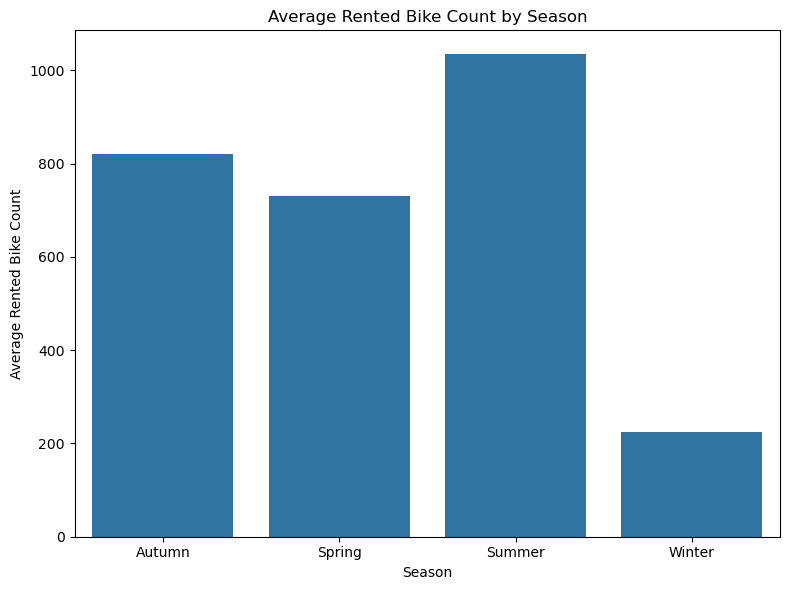

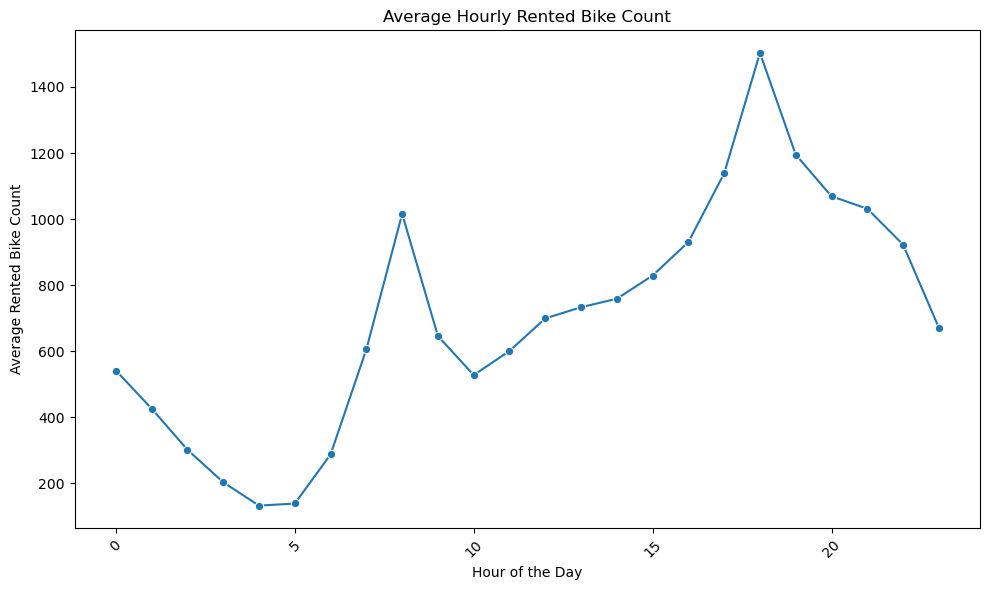

In [13]:
# Task 4: Data Visualization

# Import visualization libraries (matplotlib, seaborn)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Select appropriate visualization techniques for the data:
# Bar plot for average rentals by Seasons
plt.figure(figsize=(8,6))
sns.barplot(x='Seasons', y='Rented Bike Count', data=df, estimator=np.mean, errorbar=None)
plt.title("Average Rented Bike Count by Season")
plt.xlabel("Season")
plt.ylabel("Average Rented Bike Count")
plt.tight_layout()
# Save the plot
plt.savefig("avg_rentals_by_season.png")
plt.show()
# Line plot showing hourly rentals throughout the day
hourly_rentals = df.groupby('Hour')['Rented Bike Count'].mean().sort_index() # might need to convert hour to numeric instead of categorical

plt.figure(figsize=(10,6))
sns.lineplot(x=hourly_rentals.index, y=hourly_rentals.values, marker='o')
plt.title("Average Hourly Rented Bike Count")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Rented Bike Count")
plt.xticks(rotation=45)
plt.tight_layout()
# Save the plot
plt.savefig("hourly_rentals_lineplot.png")
plt.show()


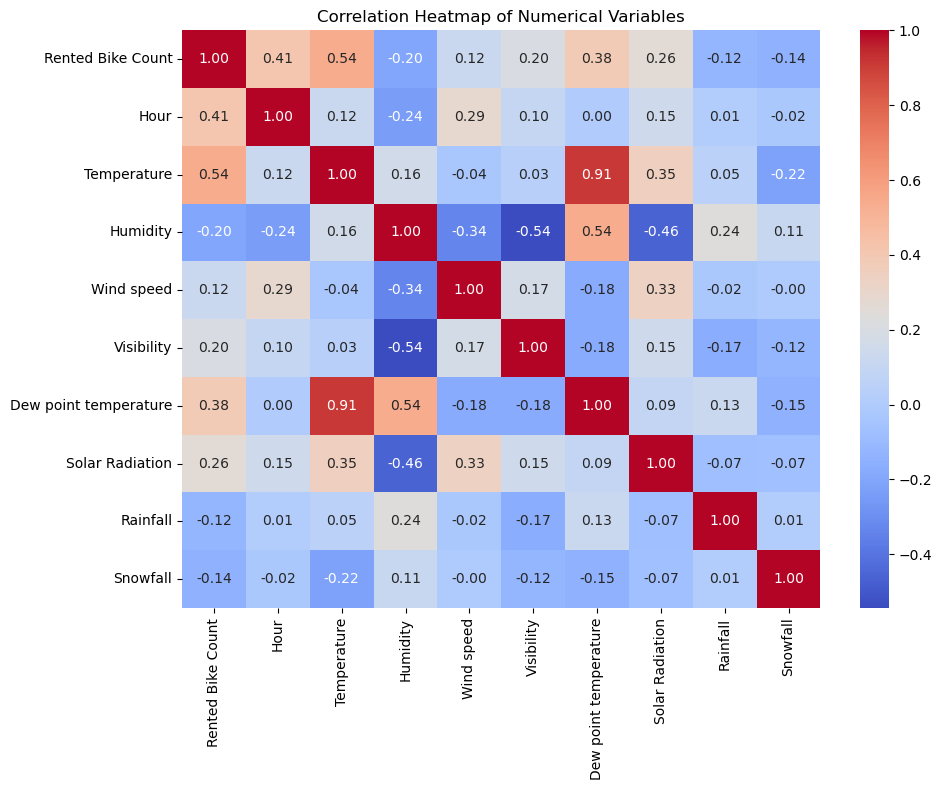

In [14]:
# Heatmap showing correlation among numerical variables
plt.figure(figsize=(10,8))
num_df = df.select_dtypes(include=['number']) # only chose the columns with numeric data and make a new dataframe
corr = num_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Variables")
plt.tight_layout()
plt.savefig("numerical_variables_heatmap.png")
plt.show()




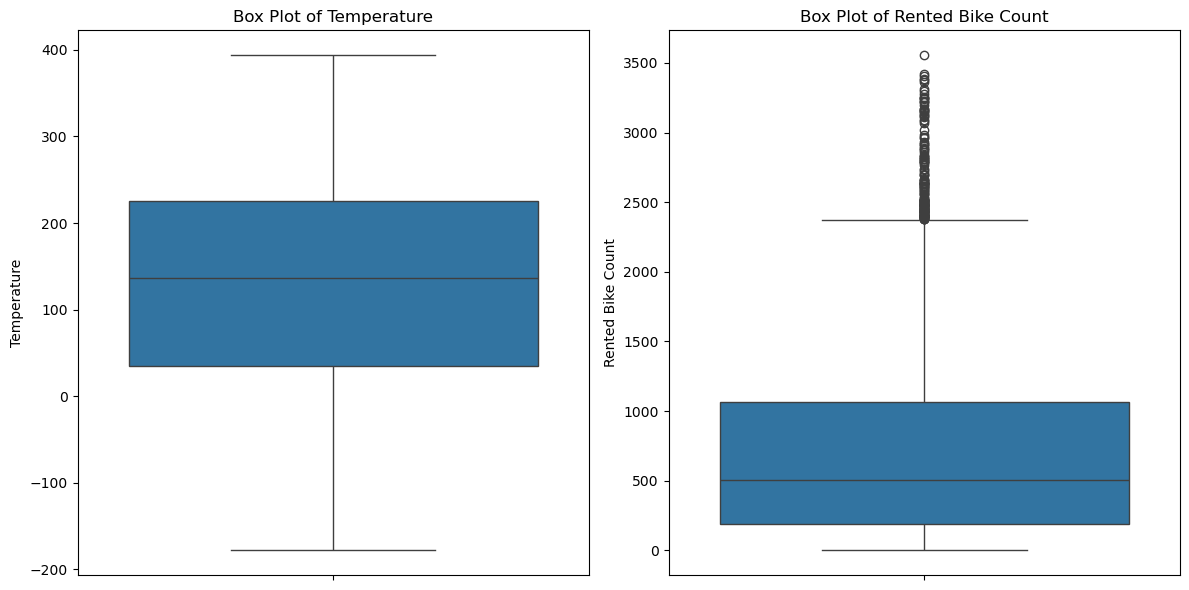

In [15]:
# Box plot to identify outliers in Temperature and Rented Bike Count
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
sns.boxplot(y='Temperature', data=df)
plt.title("Box Plot of Temperature")

plt.subplot(1, 2, 2)
sns.boxplot(y='Rented Bike Count', data=df)
plt.title("Box Plot of Rented Bike Count")

plt.tight_layout()
# Save the plot
plt.savefig("boxplots_temperature_rentals.png")
plt.show()



In [16]:
# Record observations and insights from visualizations
report_observations = """
Data Visualization Report:

1. Average Rentals By Season -
 - The bar plot shows the average rented bike counts for each season
 - This helps understand which seasons have the highest and lowest bike rentals

2. Hourly Rentals per time of day
 - Initially I thought this data was how many hours the bike was rented.  But then I noticed that it was numbers 0-24 and realized it represents the actual hour of the day for the rental.
 - The line plot displays the trend of bike rentals across the hours of the day.
 - It shows the peak hours when rentals are the highest.  As would be expected, the low activity periods are the early morning or later at night.

3. Correlation Heatmap - 
 - This visualizes the correlation among numeric data
 - It can help identify how the amount of bike rentals are affected by all the other factors and how they all work together.

4. Box Plots for outlier direction
 - The box plots help to identify where the outliers are for temperature as that relates to bike rentals
 - The outliers might suggest that there were special events or holidays where someone were to rent a bike even though the temperature wasn't to their liking for bike riding.  It could also mean that there were some data entry mistakes by the staff.

"""

# Save plots and observations for reporting purposes
print(report_observations) 


# Save the report to a text file
with open("data_visualization_report.txt", "w") as file:
    file.write(report_observations)



Data Visualization Report:

1. Average Rentals By Season -
 - The bar plot shows the average rented bike counts for each season
 - This helps understand which seasons have the highest and lowest bike rentals

2. Hourly Rentals per time of day
 - Initially I thought this data was how many hours the bike was rented.  But then I noticed that it was numbers 0-24 and realized it represents the actual hour of the day for the rental.
 - The line plot displays the trend of bike rentals across the hours of the day.
 - It shows the peak hours when rentals are the highest.  As would be expected, the low activity periods are the early morning or later at night.

3. Correlation Heatmap - 
 - This visualizes the correlation among numeric data
 - It can help identify how the amount of bike rentals are affected by all the other factors and how they all work together.

4. Box Plots for outlier direction
 - The box plots help to identify where the outliers are for temperature as that relates to bike re